In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde 

import sys
sys.path.append('./src')

from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

property = 'Wind_pre_7'

s_c = 'ALL'

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]
df_sampled = df[(df.loc[:, weather_columns] != -1).all(axis=1) & (df.loc[:, weather_columns] != 0).all(axis=1)]

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()
x = np.linspace(min_amount, max_amount, num=50)
kde_values = kernel(x)

print(f'min value: {min_amount}; max value: {max_amount}')

min value: 0.262937063; max value: 19.88060606


/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/Task1/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


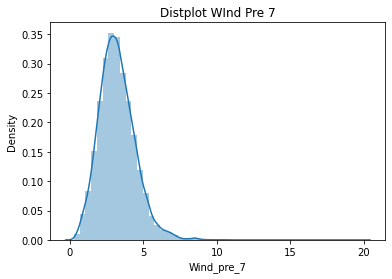

In [4]:
sns.distplot(df_sampled[property])
plt.title('Distplot WInd Pre 7')
plt.savefig('./figures/kde/Wind_pre_7.png')
plt.show()

In [17]:
df_sampled.Wind_pre_7.value_counts().sort_values()

4.345604    1
3.379894    1
3.749701    1
1.643056    1
2.255294    1
           ..
0.792757    5
4.150595    5
4.400000    5
4.593889    6
2.292095    7
Name: Wind_pre_7, Length: 12115, dtype: int64

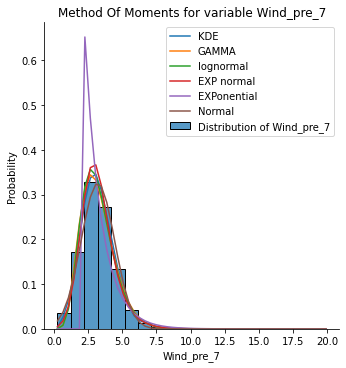

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.36, pvalue=0.002834980581320342), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.4578000000000024, pvalue=0.05112092905699761)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.38, pvalue=0.0013147736033165794), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.5137999999999998, pvalue=0.036729302938237396)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.38, pvalue=0.0013147736033165794), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.5457999999999998, pvalue=0.03048485882684937)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.3, pvalue=0.02170784069014051), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.30020000000000024, pvalue=0.13586505813887295)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statistic

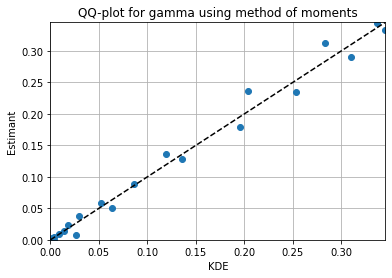

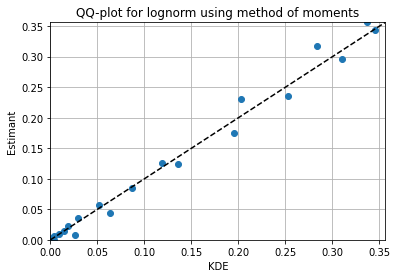

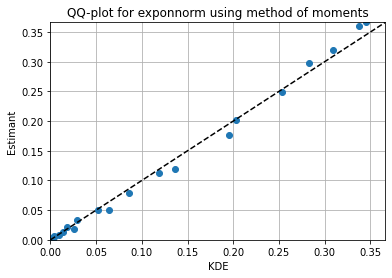

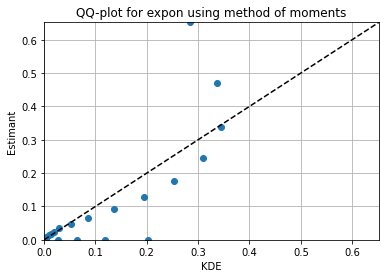

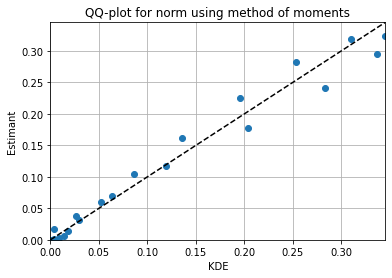

In [18]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 20)

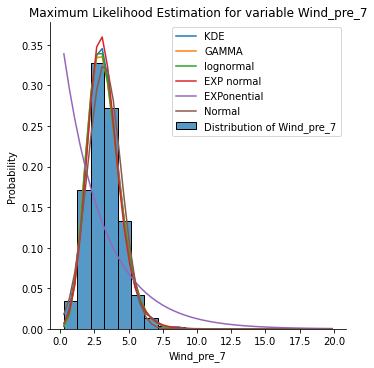

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.34, pvalue=0.005841778142694731), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.41100000000000136, pvalue=0.06775609572335606)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.36, pvalue=0.002834980581320342), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.4529999999999994, pvalue=0.052606475413884635)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.38, pvalue=0.0013147736033165794), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.5226000000000006, pvalue=0.03488859460465488)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.54, pvalue=4.929118631187453e-07), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=1.7570000000000014, pvalue=4.3588816605488745e-05)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(stat

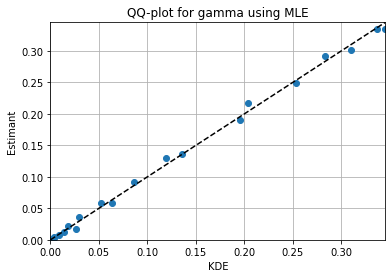

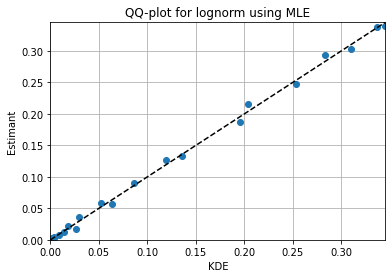

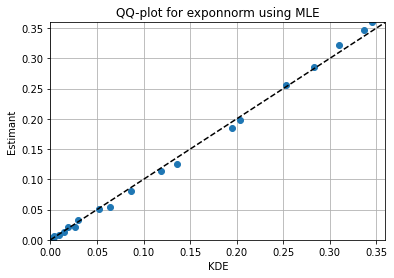

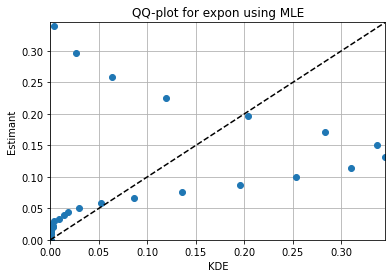

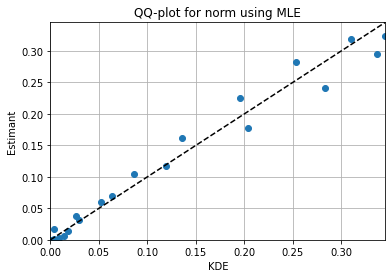

In [19]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 20)

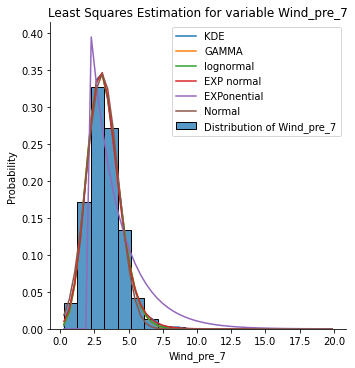

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.32, pvalue=0.011511738725894704), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.3666000000000018, pvalue=0.08903356380455107)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.34, pvalue=0.005841778142694731), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.39780000000000015, pvalue=0.07343858790100188)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.38, pvalue=0.0013147736033165794), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.5222000000000016, pvalue=0.03497012494432161)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.36, pvalue=0.002834980581320342), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=0.7070000000000007, pvalue=0.012174301507085095)
FOR norm: Kolmogorov-Smirnoff test result KstestResult(statisti

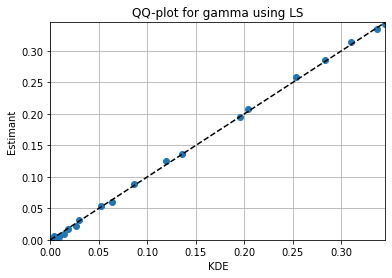

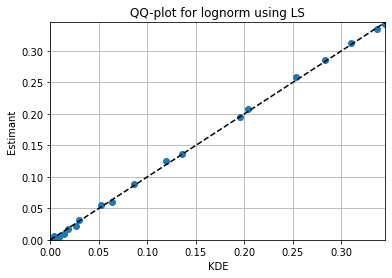

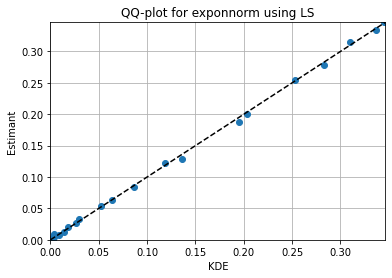

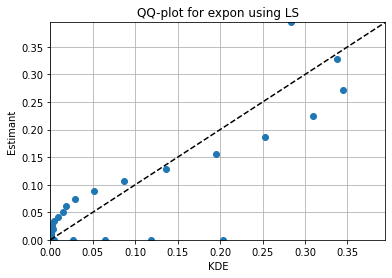

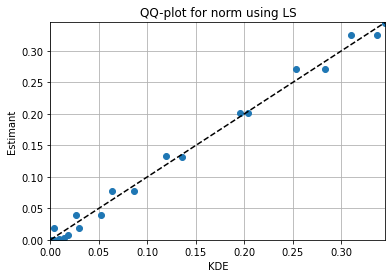

In [20]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 20)

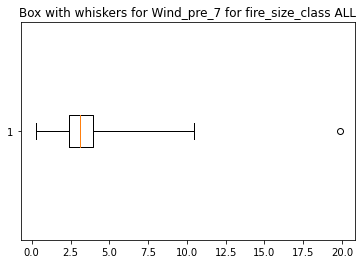

In [21]:
plt.boxplot(df_sampled[property], vert=False, whis=5)
plt.title(f'Box with whiskers for {property} for fire_size_class {s_c}')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()